# Projection Plots of Njets2p5 on 2 (feature) dimensions 

-) the most relevant functions are called from effPlotwidget.py

### Instructions:
execute a cell with shift+enter :-)

#### suggestions for improvement
-) The binnning for pt-type variables and rapidity-type variables is fixed. It could be customized using the widgets

-) When performing a (detector) effieciency plot the mass reconstruction type as well as the number of jets are irrelevant. Nevertheless, the buttons are still enabled

-) Could improve a lot the visiual appearance of the widgets (design)

-) Plot design - units, overlapping tickmarks, scientific notation, axis labels...

In [7]:
from ipywidgets import interact, fixed, interactive, widgets, interact_manual
from IPython.display import display, clear_output

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

import effPlotwidget as effplt
reload(effplt)
effplt.defaultWidgets()

#### specify the directory where the classifier is stored

In [8]:
w = interactive(effplt.GetDictionary,inputDir=effplt.widgetparams['w_inputDir'])
display(w)

classifiers found


({u'Train_Configurable_Refactor_higgs_model_dep_1702482': u'Train_Configurable_Refactor_higgs_model_dep_1702482',
  u'Train_Configurable_Refactor_higgs_model_dep_1735132': u'Train_Configurable_Refactor_higgs_model_dep_1735132',
  u'effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out': u'effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out',
  u'effGenVarClassBinnedRecoPt_out': u'effGenVarClassBinnedRecoPt_out',
  u'effGenVarClass_binnedPtNjets_out': u'effGenVarClass_binnedPtNjets_out',
  u'effGenVarClass_binnedRecoPt_out': u'effGenVarClass_binnedRecoPt_out',
  u'fullBDT': u'fullBDT'},
 u'./classifiers')

#### specify the directory where the data (root trees) is stored. Afterwards you can choose from a Dropdown among the classifiers which are available in the directory you chose in the previous cell

Note: Since it takes some time to load the classifier you need to tick the Checkbox "Load classifier" in order to launch the loading process.

In [5]:
#extract the dictionary with the classifier names found in the
#given directory plus the directory name
class_dict = w.result[0]
inDir = w.result[1]

fitterObject = interactive(effplt.GetFitter,
                           inputName=class_dict,
                            dataDir =effplt.widgetparams['w_dataDir'],
                            inputDir=fixed(inDir),
                            load = effplt.widgetparams['w_Load']
                          )

display(fitterObject)

entered config files named my_train_config
None
Load object with the name fullBDT and the following paramters 
./classifiers
./classifiers/fullBDT.pkl.gz
loading pickle ./classifiers/fullBDT.pkl.gz
loading data ./classifiers/fullBDT.root
Index([u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Rapidity0',
       u'genJet2p5Rapidity1', u'genJet2p5Rapidity2', u'genJet2p5Rapidity3',
       u'genNjets2p5', u'genPt', u'genRapidity', u'recoNjets2p5', u'recoPt',
       u'recoRapidity', u'weight', u'proc', u'absGenRapidity',
       u'absGenJet2p5Rapidity0', u'absGenJet2p5Rapidity1',
       u'absGenJet2p5Rapidity2', u'absGenJet2p5Rapidity3', u'recoPtBin',
       u'recoPtCat', u'recoNjets2p5Bin', u'recoNjets2p5Cat', u'class_prob_0',
       u'class_prob_1', u'class_prob_2', u'class_prob_3', u'recoPtCat_prob_0',
       u'recoPtCat_prob_1', u'recoPtCat_prob_2', u'recoPtCat_prob_3',
       u'recoPtCat_prob_4', u'recoPtCat_prob_5', u'recoPtC

#### Look at the desired projection plot

Specifiy the x- and y-axis of the projection. You need to specify either which di-photon mass resolution category and the number of jets or whether to plot the total efficiency.

Press the button "Run NjetsEffPlots" to see the plots with your settings.

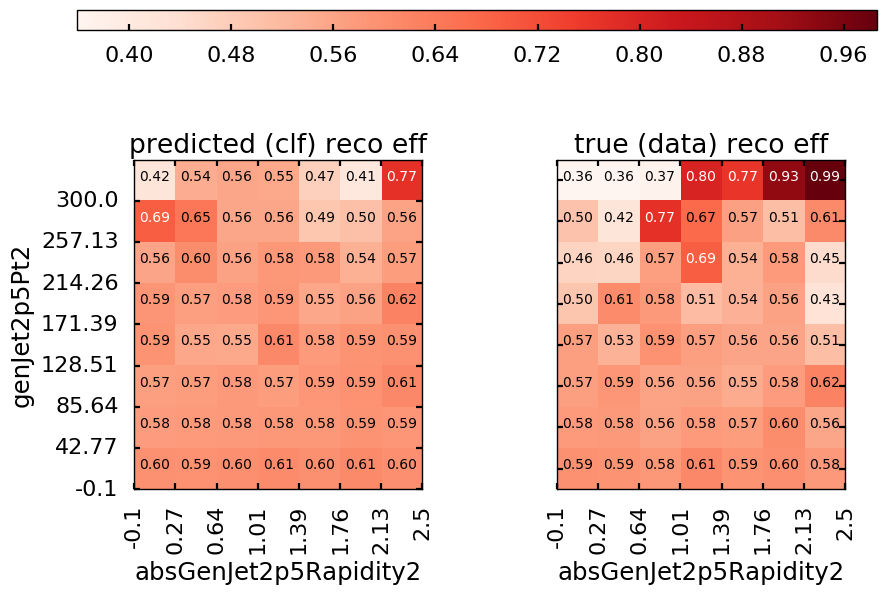

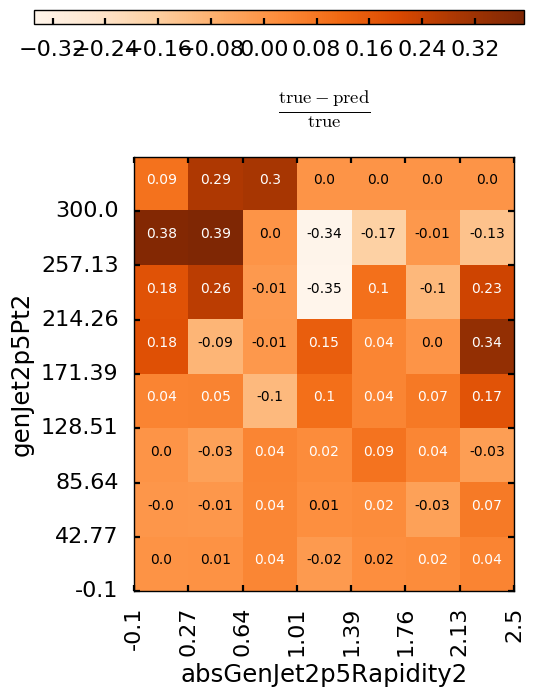

In [6]:
interact_manual(effplt.NjetsEffPlots,effFitter=fixed(fitterObject.result),
                x_var=effplt.widgetparams['w_varName_x'],
                y_var=effplt.widgetparams['w_varName_y'],
                m_gamma_cat=effplt.widgetparams['w_mres_cat'], 
                Njets=effplt.widgetparams['w_noJets'], 
                effTag=effplt.widgetparams['w_detector_eff'])
